In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Telco-Customer-Churn.xlsx - Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 1. Compare churn count with respect to gender

In [13]:
data_1=data[['gender','Churn','SeniorCitizen']]
data_1

,gender,Churn,SeniorCitizen
0,Female,No,0
1,Male,No,0
2,Male,Yes,0
3,Male,No,0
4,Female,Yes,0
...,...,...,...
7038,Male,No,0
7039,Female,No,0
7040,Female,No,0
7041,Male,Yes,1


In [16]:
data_female=data_1.drop(data[data["gender"]=="Male"].index)
dfc=data_female['Churn'].value_counts()
dfc

No     2549
Yes     939
Name: Churn, dtype: int64

In [17]:
data_male=data_1.drop(data[data["gender"]=="Female"].index)
dmc=data_male['Churn'].value_counts()
dmc

No     2625
Yes     930
Name: Churn, dtype: int64

In [83]:
f1=dfc["Yes"]
f2=dfc["No"]
f3=dmc["Yes"]
f4=dmc["No"]

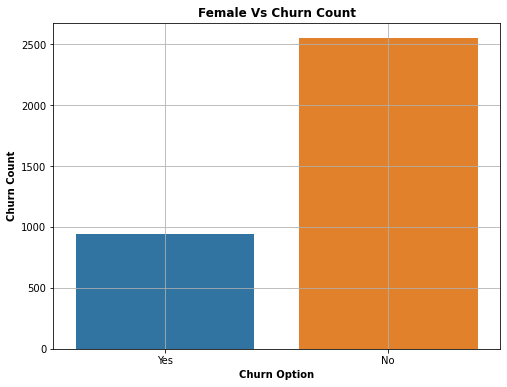

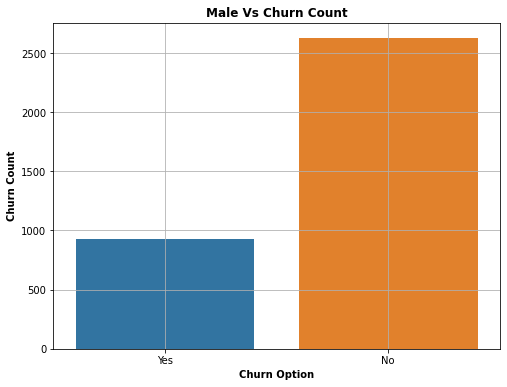

In [156]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=["Yes","No"], y=[f1,f2])
plt.grid()
plt.title('Female Vs Churn Count',fontsize=12,fontweight='bold')
plt.xlabel('Churn Option',fontsize=10,fontweight='bold')
plt.ylabel('Churn Count',fontsize=10,fontweight='bold')
plt.show()

plt.figure(figsize=(8,6))
bx = sns.barplot(x=["Yes","No"], y=[f3,f4])
plt.grid()
plt.title('Male Vs Churn Count',fontsize=12,fontweight='bold')
plt.xlabel('Churn Option',fontsize=10,fontweight='bold')
plt.ylabel('Churn Count',fontsize=10,fontweight='bold')
plt.show()

# 2. Find out how many female senior citizens there in the dataset

In [25]:
senior_citizen=data_female['SeniorCitizen'].value_counts()
print('The number of female senior citizens in the dataset is',senior_citizen[1])

The number of female senior citizens in the dataset is 568


# 3.  Compare 'tenure' with 'Total Charges' 

In [150]:
data['tenure'] = pd.to_numeric(data['tenure'],errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

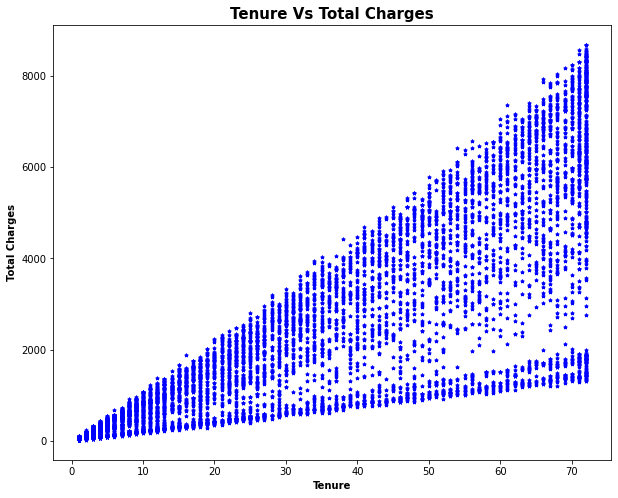

In [98]:
plt.figure(figsize=(10,8))
plt.scatter(data['tenure'],data['TotalCharges'],s=12,color='blue',marker='*')
plt.title("Tenure Vs Total Charges",fontsize =15,fontweight='bold')
plt.xlabel('Tenure',fontweight='bold')
plt.ylabel('Total Charges',fontweight='bold')
plt.show()

# 4. Find out which contract preffered by the senior citizen

In [101]:
data_2=data[['SeniorCitizen','Contract']]
data_3=data_2.drop(data[data["SeniorCitizen"]==0].index)
data_3

,SeniorCitizen,Contract
20,1,Month-to-month
30,1,Two year
31,1,Month-to-month
34,1,Month-to-month
50,1,Month-to-month
...,...,...
7023,1,Month-to-month
7029,1,Month-to-month
7031,1,One year
7032,1,Month-to-month


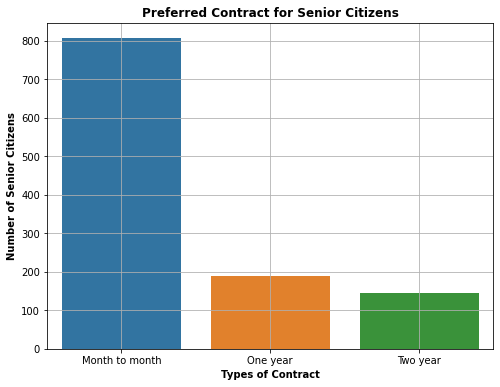

The interest of contract preferred by the senior citizens is for Month to month


In [152]:
plt.figure(figsize=(8,6))
cx = sns.barplot(x=["Month to month","One year","Two year"], y=[Month_to_month,one_year,two_year])
plt.grid()
plt.title('Preferred Contract for Senior Citizens',fontsize=12,fontweight='bold')
plt.xlabel('Types of Contract',fontsize=10,fontweight='bold')
plt.ylabel('Number of Senior Citizens',fontsize=10,fontweight='bold')
plt.show()


seniorCitizen_interest=data_3['Contract'].value_counts()
Month_to_month=seniorCitizen_interest["Month-to-month"]
one_year=seniorCitizen_interest["One year"]
two_year=seniorCitizen_interest["Two year"]
maximum=max(Month_to_month,one_year,two_year)
if (maximum==Month_to_month):
    a1='Month to month'
elif(maximum==one_year):
     a1='One year'
else:
     a1='Two year'
print('The interest of contract preferred by the senior citizens is for',a1)

# 5. Comment your finds on Payment Method?

In [149]:
payment_method=data['PaymentMethod'].value_counts()
payment_method

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

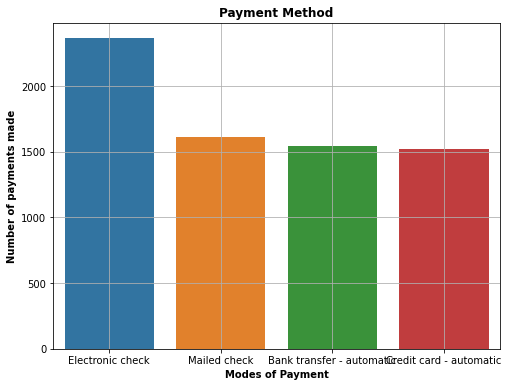

The mode of payment mostly prefered by the senior citizens is Electronic check ( 2365 )


In [153]:
p1=payment_method["Electronic check"]
p2=payment_method["Mailed check"]
p3=payment_method["Bank transfer (automatic)"]
p4=payment_method["Credit card (automatic)"]

plt.figure(figsize=(8,6))
cx = sns.barplot(x=["Electronic check","Mailed check","Bank transfer - automatic","Credit card - automatic"], y=[p1,p2,p3,p4])
plt.grid()
plt.title('Payment Method',fontsize=12,fontweight='bold')
plt.xlabel('Modes of Payment',fontsize=10,fontweight='bold')
plt.ylabel('Number of payments made',fontsize=10,fontweight='bold')
plt.show()

pm1=payment_method["Electronic check"]
pm2=payment_method["Mailed check"]
pm3=payment_method["Bank transfer (automatic)"]
pm4=payment_method["Credit card (automatic)"]
pm_max=max(pm1,pm2,pm3,pm4)
if (pm_max==pm1):
    pm='Electronic check'
elif(pm_max==pm2):
     pm='Mailed check'
elif(pm_max==pm3):
     pm='Bank transfer (automatic)'
else:
     pm='Credit card (automatic)'
        
print('The mode of payment mostly prefered by the senior citizens is',pm,'(',pm_max,')')